In [ ]:
#import basic library
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings("ignore")


In [ ]:
#import data
url ="https://drive.google.com/file/d/1s5ZjoaeNbrRhY671uDwsSeaXTs7DHLPN/view?usp=sharing"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,low_memory=False)
df.shape

(100001, 12)

In [ ]:
newdf = df.dropna()                                         #dropping row containing NaN value
newdf.reset_index(drop = True, inplace = True)              #index reset
newdf

,TweetID,Day,Hour,Lang,IsReshare,Reach,RetweetCount,Likes,Sentiment,text,LocationID,UserID
0,tw-682712873332805633,Thursday,17.0,en,False,44.0,0.0,0.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,tw-682713045357998080,Thursday,17.0,en,True,1810.0,5.0,0.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,tw-682713219375476736,Thursday,17.0,en,False,282.0,0.0,0.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,tw-682713436967579648,Thursday,17.0,en,False,2087.0,4.0,0.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,tw-682714048199311366,Thursday,17.0,en,False,953.0,0.0,0.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669
...,...,...,...,...,...,...,...,...,...,...,...,...
992,tw-683738642334892032,Sunday,12.0,en,False,22.0,0.0,0.0,2.0,@pseudocode It allows for: @SassCSS file revis...,3874.0,tw-964383511
993,tw-683739639107203073,Sunday,13.0,en,False,70.0,0.0,0.0,0.0,We are hiring: Amazon S3 Software Development ...,3751.0,tw-289094642
994,tw-683739842673520640,Sunday,13.0,en,False,17422.0,0.0,0.0,0.0,Ace the Amazon Web Services Certification Exam...,82.0,tw-22445925
995,tw-683740297575051265,Sunday,13.0,en,False,710.0,0.0,0.0,0.0,@shfitriah aws .. English stfu,1885.0,tw-552022479


In [ ]:
days = newdf.Day.unique()
print(days)                                                 #print unique days
newdf.groupby(" Likes").count()
newdf.replace(days , range(len(days)) , inplace = True)     #replacing days by number
newdf


['Thursday' 'Friday' 'Saturday' 'Sunday']


,TweetID,Day,Hour,Lang,IsReshare,Reach,RetweetCount,Likes,Sentiment,text,LocationID,UserID
0,tw-682712873332805633,0,17.0,en,False,44.0,0.0,0.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,tw-682713045357998080,0,17.0,en,True,1810.0,5.0,0.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,tw-682713219375476736,0,17.0,en,False,282.0,0.0,0.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,tw-682713436967579648,0,17.0,en,False,2087.0,4.0,0.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,tw-682714048199311366,0,17.0,en,False,953.0,0.0,0.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669
...,...,...,...,...,...,...,...,...,...,...,...,...
992,tw-683738642334892032,3,12.0,en,False,22.0,0.0,0.0,2.0,@pseudocode It allows for: @SassCSS file revis...,3874.0,tw-964383511
993,tw-683739639107203073,3,13.0,en,False,70.0,0.0,0.0,0.0,We are hiring: Amazon S3 Software Development ...,3751.0,tw-289094642
994,tw-683739842673520640,3,13.0,en,False,17422.0,0.0,0.0,0.0,Ace the Amazon Web Services Certification Exam...,82.0,tw-22445925
995,tw-683740297575051265,3,13.0,en,False,710.0,0.0,0.0,0.0,@shfitriah aws .. English stfu,1885.0,tw-552022479


In [ ]:
y = np.array(newdf["Day"])           
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
x = newdf.drop(["Day"," text"," UserID"," Lang"," IsReshare"," RetweetCount"," Likes"] , axis = 1)    #droping irrrelevent column
x

,TweetID,Hour,Reach,Sentiment,LocationID
0,tw-682712873332805633,17.0,44.0,0.0,3751.0
1,tw-682713045357998080,17.0,1810.0,2.0,3989.0
2,tw-682713219375476736,17.0,282.0,0.0,3741.0
3,tw-682713436967579648,17.0,2087.0,0.0,3753.0
4,tw-682714048199311366,17.0,953.0,0.0,3751.0
...,...,...,...,...,...
992,tw-683738642334892032,12.0,22.0,2.0,3874.0
993,tw-683739639107203073,13.0,70.0,0.0,3751.0
994,tw-683739842673520640,13.0,17422.0,0.0,82.0
995,tw-683740297575051265,13.0,710.0,0.0,1885.0


In [ ]:
x['TweetID'] = x['TweetID'].apply(lambda a: int(a[3:]))    #transforming TweetID by int value
x

,TweetID,Hour,Reach,Sentiment,LocationID
0,682712873332805633,17.0,44.0,0.0,3751.0
1,682713045357998080,17.0,1810.0,2.0,3989.0
2,682713219375476736,17.0,282.0,0.0,3741.0
3,682713436967579648,17.0,2087.0,0.0,3753.0
4,682714048199311366,17.0,953.0,0.0,3751.0
...,...,...,...,...,...
992,683738642334892032,12.0,22.0,2.0,3874.0
993,683739639107203073,13.0,70.0,0.0,3751.0
994,683739842673520640,13.0,17422.0,0.0,82.0
995,683740297575051265,13.0,710.0,0.0,1885.0


In [ ]:
x = x.values
x

array([[6.82712873e+17, 1.70000000e+01, 4.40000000e+01, 0.00000000e+00,
        3.75100000e+03],
       [6.82713045e+17, 1.70000000e+01, 1.81000000e+03, 2.00000000e+00,
        3.98900000e+03],
       [6.82713219e+17, 1.70000000e+01, 2.82000000e+02, 0.00000000e+00,
        3.74100000e+03],
       ...,
       [6.83739843e+17, 1.30000000e+01, 1.74220000e+04, 0.00000000e+00,
        8.20000000e+01],
       [6.83740298e+17, 1.30000000e+01, 7.10000000e+02, 0.00000000e+00,
        1.88500000e+03],
       [6.83741221e+17, 1.30000000e+01, 1.69100000e+03, 0.00000000e+00,
        5.39400000e+03]])

Dendogram

In [ ]:
def visual(key , t, x):
  if key == "single":
    z = linkage(x,'single')
  else:
    z = linkage(x, "complete")
  for i in range(len(z)):
   z[i][2] = z[i][2]/1e+10

  plt.figure(figsize =[25,10])
  plt.xlabel('index')
  plt.ylabel('distance')
  dendrogram( z , leaf_font_size = 8 )
  plt.axhline(y=t , c='red')
  plt.show() 

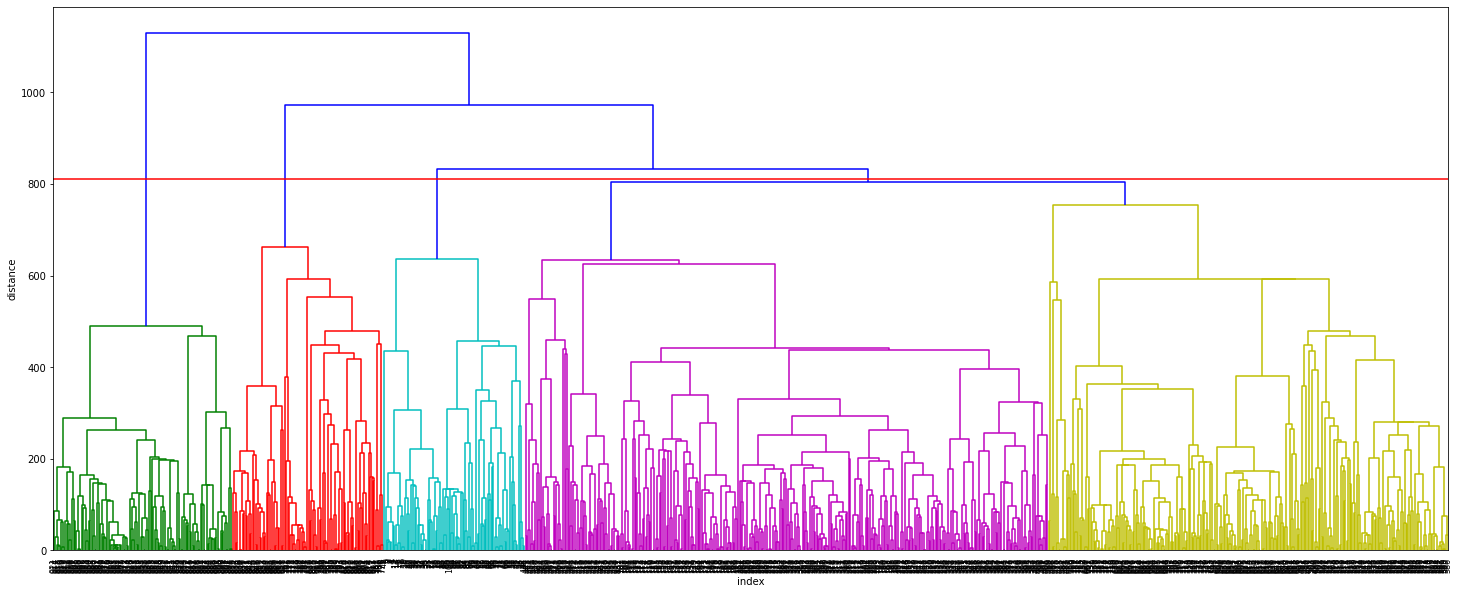

In [ ]:
visual('single',810,x)

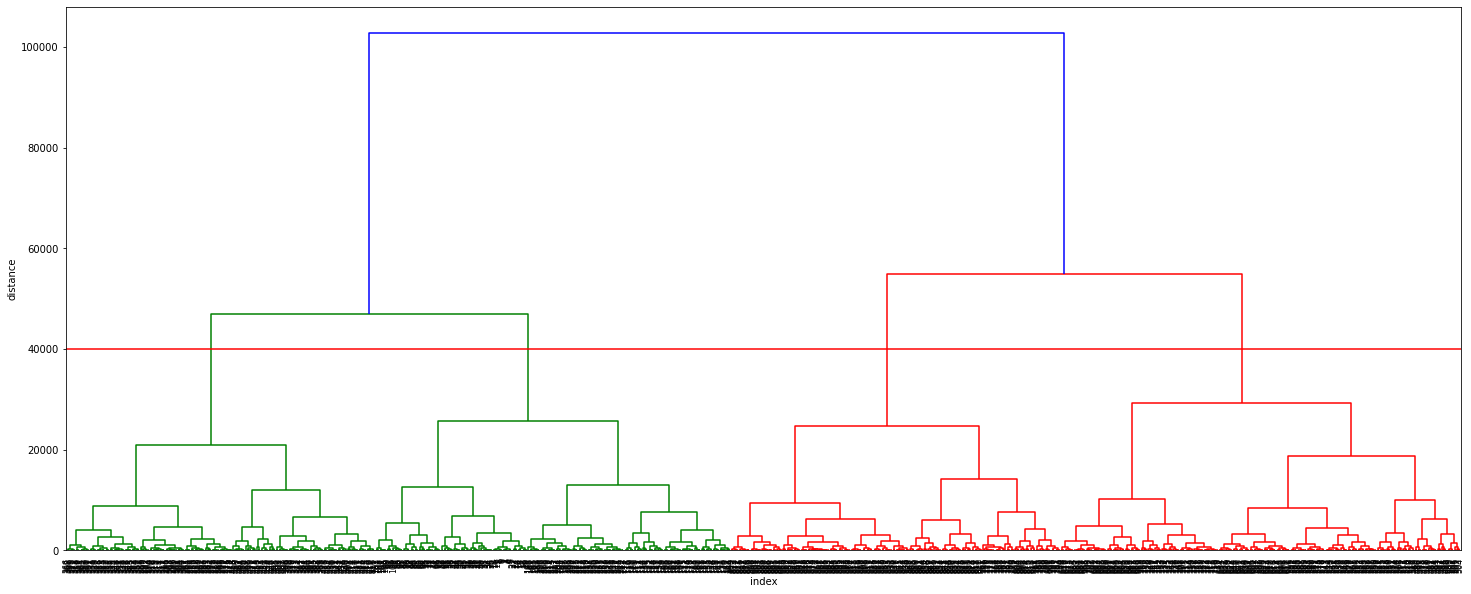

In [ ]:
visual('complete',40000,x)

Hierarchical Agglomerative clustering 

In [ ]:
def eudist(i , j , x):        #function to calculate euclidean distance
  if i > j :
    d = np.sum((x[i]-x[j])**2)
  else:
    d = 0                     # value of inputs of upper triangle and diagonal is 0  
  return np.sqrt(d)
  
    
def comp( d , mins , i , j):  # function to calculate the minimun distance with its row and column in the matrix 
  if d < mins[0]:
    mins = [ d , i , j ]
  return mins

def no(cluster_list):         #function to calculate no of clusters in the list
  a = 0
  for i in cluster_list:
    if i[0] != 'p':
      a = a+1
  return a

In [ ]:
def initilizing_cluster_list():   #list to check the clusters
  cluster_list = []             
  for i in range(len(x)):
    cluster_list.append([i])
  return cluster_list

In [ ]:
def creat_data(x):            #augmented matrix
  data = pd.DataFrame()    
  for c in range(len(x)):
    column =[]
    for r in range(len(x)):
      d = eudist(r,c,x)
      column.append(d)
    data[c] = column
   
  return data


In [ ]:
def clustering(x , method):

  data = creat_data(x)                  #creat the distance matrix
  
  cluster_list = initilizing_cluster_list()  # initilizing cluster list

  if method == "single":
    threshold = 810e+10
  else:
    threshold = 40000e+10


  for b in range(len(x)):
    p = data.columns[1]
    q = data.columns[0]
    comp_li = [data.loc[p,q] , p ,q]    # initilizing comp_lil


    for r1 in data.columns:             # computing minimum distance in the augmented matrix
      k = 0
      while data.columns[k] != r1:
        c1 = data.columns[k]
        comp_li = comp(data.loc[r1,c1],comp_li,r1,c1)
        k = k+1
          

    r2 = comp_li[1]                     #row of min distance
    c2 = comp_li[2]                     #column of min distance

    if comp_li[0] > threshold:          #condition to terminate the loop
      break

    #update the column

    change = np.array(data[r2])        
    for values , i in enumerate(change):
      count = data.columns[values]
      if i!= 0:
        if method == 'single':
          change[values] =  min( data.loc[count,r2] ,data.loc[count,c2] )
        else:
          change[values] =  max( data.loc[count,r2] ,data.loc[count,c2] )
    data[r2]=change

    #update the row

    change = np.array(data.loc[r2])   
    for values,i in enumerate(change):
      a = data.columns[values]
      if a == r2:
        break
      else:
        if a != c2:
          if method == 'single':
            change[values] = min( data.loc[r2,a] , data.loc[max(a,c2) ,min(a,c2)] )
          else:
            change[values] = max( data.loc[r2,a] , data.loc[max(a,c2) ,min(a,c2)] )
    data.loc[r2] = change

    data = data.drop(c2 , axis = 1)
    data = data.drop(c2 , axis = 0)

    cluster_list[r2].extend(cluster_list[c2])
    cluster_list[c2]=['p']

  z = len(cluster_list) #free the list of ['p']
  lt = 0
  while lt != z:
    z = len(cluster_list)
    if cluster_list[lt] == ['p']:
      del cluster_list[lt]
    else:
      lt = lt+1
  return cluster_list






In [ ]:
cl = clustering(x , 'single')


In [ ]:
cl

In [ ]:
from collections import Counter

In [ ]:
#visualizing count of different days in the cluster

cl_day=[]
for i in range(len(cl)):
  p= []
  for j in cl[i]:
    p.append(y[j])
  
  cl_day.append(Counter(p))   
cl_day

[Counter({0: 91, 1: 10}),
 Counter({1: 373, 2: 287}),
 Counter({2: 35, 3: 73}),
 Counter({3: 128})]

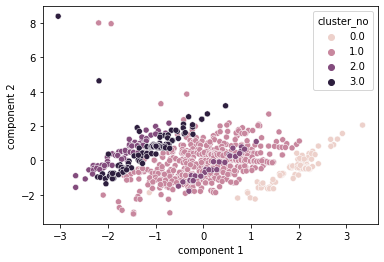

In [ ]:
#plot the cluster data 

X = StandardScaler().fit_transform(x)

pca = PCA(n_components = 2)
pcomponent = pca.fit_transform(X)
plot_data = pd.DataFrame(data = pcomponent , columns = ['component 1','component 2'])

cluster_position = np.zeros(len(y))

for values,i in enumerate(cl):
  for j in i:
    cluster_position[j] = values

plot_data['cluster_no'] = cluster_position

sns.scatterplot(data= plot_data , x = 'component 1' , y = 'component 2' , hue = 'cluster_no')

In [ ]:
# calculating accurecy for simple link

total = 0
correct = 0

for i in cl_day:
  element_no = sum(i.values())
  total = total +element_no
  correct = correct + i.most_common()[0][1] 
accurecy = (correct/total)*100
accurecy
  


66.7001003009027

In [ ]:
cl2 = clustering(x , 'complete')       # HAC for complete link

In [ ]:
cl2_day=[]
for i in range(len(cl2)):
  p= []
  for j in cl2[i]:
    p.append(y[j])
  
  cl2_day.append(Counter(p))
cl2_day

[Counter({0: 91, 1: 163}),
 Counter({1: 220, 2: 1}),
 Counter({2: 286}),
 Counter({2: 35, 3: 201})]

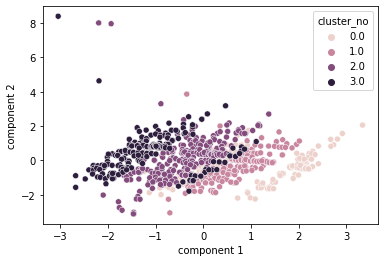

In [ ]:
#plot the cluster data 

X = StandardScaler().fit_transform(x)

pca = PCA(n_components = 2)
pcomponent = pca.fit_transform(X)

plot_data = pd.DataFrame(data = pcomponent , columns = ['component 1','component 2'])

cluster_position = np.zeros(len(y))

for values,i in enumerate(cl2):
  for j in i:
    cluster_position[j] = values

plot_data['cluster_no'] = cluster_position

sns.scatterplot(data= plot_data , x = 'component 1' , y = 'component 2' , hue = 'cluster_no')

In [ ]:
# calculating accurecy for complete link

total = 0
correct = 0

for i in cl2_day:
  element_no = sum(i.values())
  total = total +element_no
  correct = correct + i.most_common()[0][1] 
accurecy = (correct/total)*100
accurecy

87.2617853560682